Software Engineering Tools Lab       
Assignement 2                                                                         
PRN-2019BTECS00094 



**Dataset Information**

The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level,within an Italian city. Data were recorded from March 2004 to February 2005 (one year)representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) and were provided by a co-located reference certified analyzer. Evidences of cross-sensitivities as well as both concept and sensor drifts are present as described in De Vito et al., Sens. And Act. B, Vol. 129,2,2008 (citation required) eventually affecting sensors concentration estimation capabilities. **Missing values are tagged with -200 value.**
This dataset can be used exclusively for research purposes. Commercial purposes are fully excluded. 


**Attribute Information:**

0 Date (DD/MM/YYYY)

1 Time (HH.MM.SS)

2 True hourly averaged concentration CO in mg/m^3 (reference analyzer)

3 PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)

4 True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)

5 True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)

6 PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)

7 True hourly averaged NOx concentration in ppb (reference analyzer)

8 PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted)

9 True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)

10 PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)

11 PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted)

12 Temperature in Â°C

13 Relative Humidity (%)

14 AH Absolute Humidity

In [19]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
# dataset
# link https://archive.ics.uci.edu/ml/machine-learning-databases/00360/
Data = pd.read_excel('AirQualityUCI.xlsx')
Data


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


In [21]:
Data.shape
#shows number of rows and columns in the dataset

(9357, 15)

Data Pre-processing

In dataset information it is given that missing value are tagged with -200 ,so we will replace it with 0.

In [22]:
Data['CO(GT)'].value_counts()
# i.e all -200 are replaced with 0

-200.0    1683
 1.0       305
 1.4       279
 1.6       275
 1.5       273
          ... 
 9.9         1
 7.6         1
 9.3         1
 7.0         1
 8.5         1
Name: CO(GT), Length: 97, dtype: int64

In [23]:
# FINDING -200 USING SIMPLE FOR LOOPS WHICH CAN ALSO BE DONE WITH VALUE_COUNTS AND THEN REPLACED
l=[]
for i in range(len(Data.columns)):
    f=Data.columns[i]
    count=0
    for j in range(len(Data[f])):
        if Data[f][j]==-200:
            count+=1
    l.append((f,count))                     
print("Values from each column that needs to be replaced with avg \n ",l) 

Values from each column that needs to be replaced with avg 
  [('Date', 0), ('Time', 0), ('CO(GT)', 1683), ('PT08.S1(CO)', 366), ('NMHC(GT)', 8443), ('C6H6(GT)', 366), ('PT08.S2(NMHC)', 366), ('NOx(GT)', 1639), ('PT08.S3(NOx)', 366), ('NO2(GT)', 1642), ('PT08.S4(NO2)', 366), ('PT08.S5(O3)', 366), ('T', 366), ('RH', 366), ('AH', 366)]


In [24]:
num=Data._get_numeric_data()
num[num<0]=0
Data

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,3.1,1314.25,0,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,0,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,0,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,0,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


In [25]:
Data['CO(GT)'].value_counts()
# i.e all -200 are replaced with 0

0.0    1683
1.0     305
1.4     279
1.6     275
1.5     273
       ... 
9.9       1
7.6       1
9.3       1
7.0       1
8.5       1
Name: CO(GT), Length: 97, dtype: int64

Training and Testing

In [26]:
#features
feature=Data
feature=feature.drop('Date',axis=1)
feature=feature.drop('Time',axis=1)
feature=feature.drop('C6H6(GT)',axis=1)

In [27]:
feature.head()

,CO(GT),PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.00,150,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2.0,1292.25,112,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2.2,1402.00,88,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2.2,1375.50,80,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,1.6,1272.25,51,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [28]:
#labels
label = Data['C6H6(GT)']

In [29]:
label.head()

0    11.881723
1     9.397165
2     8.997817
3     9.228796
4     6.518224
Name: C6H6(GT), dtype: float64

In [30]:
#test and train split
X_train,X_test,y_train,y_test = train_test_split(feature,label,test_size=.3)

In [31]:
print(X_train.shape,y_train.shape)

(6549, 12) (6549,)


In [32]:
print(X_test.shape,y_test.shape)

(2808, 12) (2808,)


In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [35]:
lr.score(X_test,y_test)

0.9593836249769289

In [36]:
y_pred = lr.predict(X_test)
y_pred

array([25.22105165,  8.8237993 ,  9.16831067, ...,  7.79737906,
        3.70307572,  3.58615659])

In [37]:
# The coefficients
print('Coefficients: \n',lr.coef_)

Coefficients: 
 [ 4.44175279e-01 -4.18014722e-03  5.40808435e-04  2.14754542e-02
  5.48115313e-03 -2.93017951e-03 -2.00242201e-02  4.99707842e-03
 -1.55447838e-04 -2.71503044e-01 -1.02636097e-01  1.60707701e+00]


In [38]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))

Mean squared error: 2.30


In [40]:
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Coefficient of determination: 0.96


In [41]:
# the r squared value
print('R squared value: %.2f'%r2_score(y_test, y_pred))

R squared value: 0.96


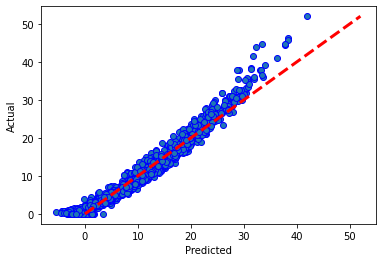

In [43]:
fig, ax = plt.subplots()
ax.scatter(y_pred, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()